라이브러리 로드

In [10]:
import torch 
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import pytorch_model_summary
from model_resnet import *
import torch.utils.model_zoo as model_zoo
from torchvision.models.resnet import model_urls
from torchvision_edit.models_e.convnext_e_cbam import *

GPU 설정

In [11]:
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

데이터 로드

In [12]:
train_transform=transforms.Compose([transforms.ToTensor(),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.Normalize((0.5,),(0.5,))])

test_transform=transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,),(0.5,))])

In [13]:
trainset=datasets.FashionMNIST(root='content',
train=True,download=True,
transform=train_transform)

testset=datasets.FashionMNIST(root='content',
train=False,download=True,
transform=test_transform)

In [14]:
print(len(trainset))
print(len(testset))

60000
10000


In [15]:
train_loader=DataLoader(trainset,batch_size=128,shuffle=True,num_workers=6)
test_loader=DataLoader(testset,batch_size=128,shuffle=False,num_workers=6)

In [16]:
images,labels=next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [17]:
steps_per_epoch=len(train_loader)
print(steps_per_epoch)

469


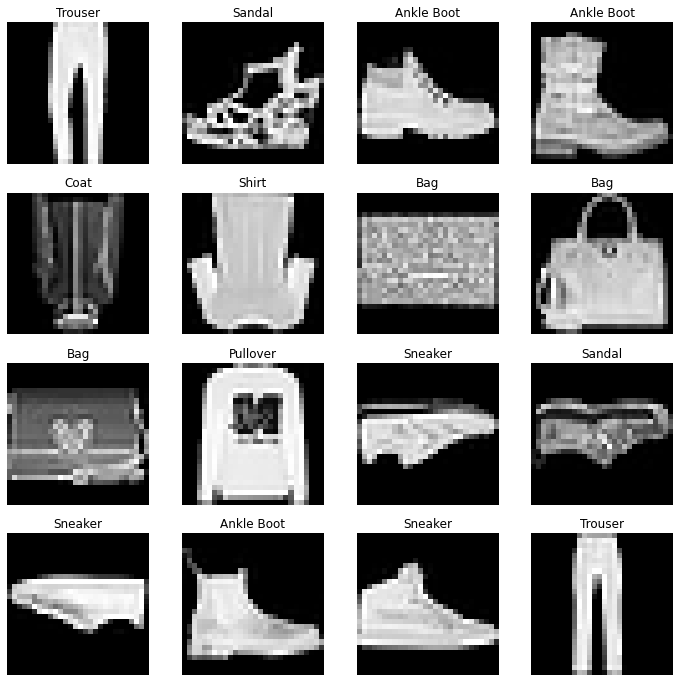

In [18]:
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

figure=plt.figure(figsize=(12,12))
cols,rows=4,4
for i in range(1,cols*rows+1):
    image=images[i].squeeze()
    label_idx=labels[i].item()
    label=classes[label_idx]

    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image,cmap='gray')

plt.show()

In [19]:
from torch import Tensor

module(module)형태로 재정의

In [33]:
class Model(nn.Module):
    def __init__(self,model):
        super(Model,self).__init__()
        self.module=model
    
    def forward(self,x):
        x=self.module(x)
        return x

학습된 weight 일부 삭제

In [34]:
path='cbam_weight/RESNET50_CBAM.pth'
checkpoint = torch.load(path)
d=checkpoint['state_dict']

# d=model_zoo.load_url(model_urls['resnet50'])

def remove(key):
    del d[key]
    return d

remove_list=["module.layer4.0.conv1.weight", "module.layer4.0.bn1.weight", "module.layer4.0.bn1.bias", "module.layer4.0.bn1.running_mean", "module.layer4.0.bn1.running_var", "module.layer4.0.conv2.weight", "module.layer4.0.bn2.weight", "module.layer4.0.bn2.bias", "module.layer4.0.bn2.running_mean", "module.layer4.0.bn2.running_var", "module.layer4.0.conv3.weight", "module.layer4.0.bn3.weight", "module.layer4.0.bn3.bias", "module.layer4.0.bn3.running_mean", "module.layer4.0.bn3.running_var", "module.layer4.0.downsample.0.weight", "module.layer4.0.downsample.1.weight", "module.layer4.0.downsample.1.bias", "module.layer4.0.downsample.1.running_mean", "module.layer4.0.downsample.1.running_var", "module.layer4.0.cbam.ChannelGate.mlp.1.weight", "module.layer4.0.cbam.ChannelGate.mlp.1.bias", "module.layer4.0.cbam.ChannelGate.mlp.3.weight", "module.layer4.0.cbam.ChannelGate.mlp.3.bias", "module.layer4.0.cbam.SpatialGate.spatial.conv.weight", "module.layer4.0.cbam.SpatialGate.spatial.bn.weight", "module.layer4.0.cbam.SpatialGate.spatial.bn.bias", "module.layer4.0.cbam.SpatialGate.spatial.bn.running_mean", "module.layer4.0.cbam.SpatialGate.spatial.bn.running_var", "module.layer4.1.conv1.weight", "module.layer4.1.bn1.weight", "module.layer4.1.bn1.bias", "module.layer4.1.bn1.running_mean", "module.layer4.1.bn1.running_var", "module.layer4.1.conv2.weight", "module.layer4.1.bn2.weight", "module.layer4.1.bn2.bias", "module.layer4.1.bn2.running_mean", "module.layer4.1.bn2.running_var", "module.layer4.1.conv3.weight", "module.layer4.1.bn3.weight", "module.layer4.1.bn3.bias", "module.layer4.1.bn3.running_mean", "module.layer4.1.bn3.running_var", "module.layer4.1.cbam.ChannelGate.mlp.1.weight", "module.layer4.1.cbam.ChannelGate.mlp.1.bias", "module.layer4.1.cbam.ChannelGate.mlp.3.weight", "module.layer4.1.cbam.ChannelGate.mlp.3.bias", "module.layer4.1.cbam.SpatialGate.spatial.conv.weight", "module.layer4.1.cbam.SpatialGate.spatial.bn.weight", "module.layer4.1.cbam.SpatialGate.spatial.bn.bias", "module.layer4.1.cbam.SpatialGate.spatial.bn.running_mean", "module.layer4.1.cbam.SpatialGate.spatial.bn.running_var", "module.layer4.2.conv1.weight", "module.layer4.2.bn1.weight", "module.layer4.2.bn1.bias", "module.layer4.2.bn1.running_mean", "module.layer4.2.bn1.running_var", "module.layer4.2.conv2.weight", "module.layer4.2.bn2.weight", "module.layer4.2.bn2.bias", "module.layer4.2.bn2.running_mean", "module.layer4.2.bn2.running_var", "module.layer4.2.conv3.weight", "module.layer4.2.bn3.weight", "module.layer4.2.bn3.bias", "module.layer4.2.bn3.running_mean", "module.layer4.2.bn3.running_var", "module.layer4.2.cbam.ChannelGate.mlp.1.weight", "module.layer4.2.cbam.ChannelGate.mlp.1.bias", "module.layer4.2.cbam.ChannelGate.mlp.3.weight", "module.layer4.2.cbam.ChannelGate.mlp.3.bias", "module.layer4.2.cbam.SpatialGate.spatial.conv.weight", "module.layer4.2.cbam.SpatialGate.spatial.bn.weight", "module.layer4.2.cbam.SpatialGate.spatial.bn.bias", "module.layer4.2.cbam.SpatialGate.spatial.bn.running_mean", "module.layer4.2.cbam.SpatialGate.spatial.bn.running_var", "module.fc.weight", "module.fc.bias"]
# remove_list=['layer4.0.conv1.weight', 'layer4.0.bn1.running_mean', 'layer4.0.bn1.running_var', 'layer4.0.bn1.weight', 'layer4.0.bn1.bias', 'layer4.0.conv2.weight', 'layer4.0.bn2.running_mean', 'layer4.0.bn2.running_var', 'layer4.0.bn2.weight', 'layer4.0.bn2.bias', 'layer4.0.conv3.weight', 'layer4.0.bn3.running_mean', 'layer4.0.bn3.running_var', 'layer4.0.bn3.weight', 'layer4.0.bn3.bias', 'layer4.0.downsample.0.weight', 'layer4.0.downsample.1.running_mean', 'layer4.0.downsample.1.running_var', 'layer4.0.downsample.1.weight', 'layer4.0.downsample.1.bias', 'layer4.1.conv1.weight', 'layer4.1.bn1.running_mean', 'layer4.1.bn1.running_var', 'layer4.1.bn1.weight', 'layer4.1.bn1.bias', 'layer4.1.conv2.weight', 'layer4.1.bn2.running_mean', 'layer4.1.bn2.running_var', 'layer4.1.bn2.weight', 'layer4.1.bn2.bias', 'layer4.1.conv3.weight', 'layer4.1.bn3.running_mean', 'layer4.1.bn3.running_var', 'layer4.1.bn3.weight', 'layer4.1.bn3.bias', 'layer4.2.conv1.weight', 'layer4.2.bn1.running_mean', 'layer4.2.bn1.running_var', 'layer4.2.bn1.weight', 'layer4.2.bn1.bias', 'layer4.2.conv2.weight', 'layer4.2.bn2.running_mean', 'layer4.2.bn2.running_var', 'layer4.2.bn2.weight', 'layer4.2.bn2.bias', 'layer4.2.conv3.weight', 'layer4.2.bn3.running_mean', 'layer4.2.bn3.running_var', 'layer4.2.bn3.weight', 'layer4.2.bn3.bias', 'fc.weight', 'fc.bias']

for i in range(len(remove_list)):
    remove(remove_list[i])

In [35]:
# path='cbam_weight/RESNET50_CBAM.pth'
# checkpoint = torch.load(path)
# d2=checkpoint['state_dict']

# add_list=["layer1.0.cbam.ChannelGate.mlp.1.weight", "layer1.0.cbam.ChannelGate.mlp.1.bias", "layer1.0.cbam.ChannelGate.mlp.3.weight", "layer1.0.cbam.ChannelGate.mlp.3.bias", "layer1.0.cbam.SpatialGate.spatial.conv.weight", "layer1.0.cbam.SpatialGate.spatial.bn.weight", "layer1.0.cbam.SpatialGate.spatial.bn.bias", "layer1.0.cbam.SpatialGate.spatial.bn.running_mean", "layer1.0.cbam.SpatialGate.spatial.bn.running_var", "layer1.1.cbam.ChannelGate.mlp.1.weight", "layer1.1.cbam.ChannelGate.mlp.1.bias", "layer1.1.cbam.ChannelGate.mlp.3.weight", "layer1.1.cbam.ChannelGate.mlp.3.bias", "layer1.1.cbam.SpatialGate.spatial.conv.weight", "layer1.1.cbam.SpatialGate.spatial.bn.weight", "layer1.1.cbam.SpatialGate.spatial.bn.bias", "layer1.1.cbam.SpatialGate.spatial.bn.running_mean", "layer1.1.cbam.SpatialGate.spatial.bn.running_var", "layer1.2.cbam.ChannelGate.mlp.1.weight", "layer1.2.cbam.ChannelGate.mlp.1.bias", "layer1.2.cbam.ChannelGate.mlp.3.weight", "layer1.2.cbam.ChannelGate.mlp.3.bias", "layer1.2.cbam.SpatialGate.spatial.conv.weight", "layer1.2.cbam.SpatialGate.spatial.bn.weight", "layer1.2.cbam.SpatialGate.spatial.bn.bias", "layer1.2.cbam.SpatialGate.spatial.bn.running_mean", "layer1.2.cbam.SpatialGate.spatial.bn.running_var", "layer2.0.cbam.ChannelGate.mlp.1.weight", "layer2.0.cbam.ChannelGate.mlp.1.bias", "layer2.0.cbam.ChannelGate.mlp.3.weight", "layer2.0.cbam.ChannelGate.mlp.3.bias", "layer2.0.cbam.SpatialGate.spatial.conv.weight", "layer2.0.cbam.SpatialGate.spatial.bn.weight", "layer2.0.cbam.SpatialGate.spatial.bn.bias", "layer2.0.cbam.SpatialGate.spatial.bn.running_mean", "layer2.0.cbam.SpatialGate.spatial.bn.running_var", "layer2.1.cbam.ChannelGate.mlp.1.weight", "layer2.1.cbam.ChannelGate.mlp.1.bias", "layer2.1.cbam.ChannelGate.mlp.3.weight", "layer2.1.cbam.ChannelGate.mlp.3.bias", "layer2.1.cbam.SpatialGate.spatial.conv.weight", "layer2.1.cbam.SpatialGate.spatial.bn.weight", "layer2.1.cbam.SpatialGate.spatial.bn.bias", "layer2.1.cbam.SpatialGate.spatial.bn.running_mean", "layer2.1.cbam.SpatialGate.spatial.bn.running_var", "layer2.2.cbam.ChannelGate.mlp.1.weight", "layer2.2.cbam.ChannelGate.mlp.1.bias", "layer2.2.cbam.ChannelGate.mlp.3.weight", "layer2.2.cbam.ChannelGate.mlp.3.bias", "layer2.2.cbam.SpatialGate.spatial.conv.weight", "layer2.2.cbam.SpatialGate.spatial.bn.weight", "layer2.2.cbam.SpatialGate.spatial.bn.bias", "layer2.2.cbam.SpatialGate.spatial.bn.running_mean", "layer2.2.cbam.SpatialGate.spatial.bn.running_var", "layer2.3.cbam.ChannelGate.mlp.1.weight", "layer2.3.cbam.ChannelGate.mlp.1.bias", "layer2.3.cbam.ChannelGate.mlp.3.weight", "layer2.3.cbam.ChannelGate.mlp.3.bias", "layer2.3.cbam.SpatialGate.spatial.conv.weight", "layer2.3.cbam.SpatialGate.spatial.bn.weight", "layer2.3.cbam.SpatialGate.spatial.bn.bias", "layer2.3.cbam.SpatialGate.spatial.bn.running_mean", "layer2.3.cbam.SpatialGate.spatial.bn.running_var", "layer3.0.cbam.ChannelGate.mlp.1.weight", "layer3.0.cbam.ChannelGate.mlp.1.bias", "layer3.0.cbam.ChannelGate.mlp.3.weight", "layer3.0.cbam.ChannelGate.mlp.3.bias", "layer3.0.cbam.SpatialGate.spatial.conv.weight", "layer3.0.cbam.SpatialGate.spatial.bn.weight", "layer3.0.cbam.SpatialGate.spatial.bn.bias", "layer3.0.cbam.SpatialGate.spatial.bn.running_mean", "layer3.0.cbam.SpatialGate.spatial.bn.running_var", "layer3.1.cbam.ChannelGate.mlp.1.weight", "layer3.1.cbam.ChannelGate.mlp.1.bias", "layer3.1.cbam.ChannelGate.mlp.3.weight", "layer3.1.cbam.ChannelGate.mlp.3.bias", "layer3.1.cbam.SpatialGate.spatial.conv.weight", "layer3.1.cbam.SpatialGate.spatial.bn.weight", "layer3.1.cbam.SpatialGate.spatial.bn.bias", "layer3.1.cbam.SpatialGate.spatial.bn.running_mean", "layer3.1.cbam.SpatialGate.spatial.bn.running_var", "layer3.2.cbam.ChannelGate.mlp.1.weight", "layer3.2.cbam.ChannelGate.mlp.1.bias", "layer3.2.cbam.ChannelGate.mlp.3.weight", "layer3.2.cbam.ChannelGate.mlp.3.bias", "layer3.2.cbam.SpatialGate.spatial.conv.weight", "layer3.2.cbam.SpatialGate.spatial.bn.weight", "layer3.2.cbam.SpatialGate.spatial.bn.bias", "layer3.2.cbam.SpatialGate.spatial.bn.running_mean", "layer3.2.cbam.SpatialGate.spatial.bn.running_var", "layer3.3.cbam.ChannelGate.mlp.1.weight", "layer3.3.cbam.ChannelGate.mlp.1.bias", "layer3.3.cbam.ChannelGate.mlp.3.weight", "layer3.3.cbam.ChannelGate.mlp.3.bias", "layer3.3.cbam.SpatialGate.spatial.conv.weight", "layer3.3.cbam.SpatialGate.spatial.bn.weight", "layer3.3.cbam.SpatialGate.spatial.bn.bias", "layer3.3.cbam.SpatialGate.spatial.bn.running_mean", "layer3.3.cbam.SpatialGate.spatial.bn.running_var", "layer3.4.cbam.ChannelGate.mlp.1.weight", "layer3.4.cbam.ChannelGate.mlp.1.bias", "layer3.4.cbam.ChannelGate.mlp.3.weight", "layer3.4.cbam.ChannelGate.mlp.3.bias", "layer3.4.cbam.SpatialGate.spatial.conv.weight", "layer3.4.cbam.SpatialGate.spatial.bn.weight", "layer3.4.cbam.SpatialGate.spatial.bn.bias", "layer3.4.cbam.SpatialGate.spatial.bn.running_mean", "layer3.4.cbam.SpatialGate.spatial.bn.running_var", "layer3.5.cbam.ChannelGate.mlp.1.weight", "layer3.5.cbam.ChannelGate.mlp.1.bias", "layer3.5.cbam.ChannelGate.mlp.3.weight", "layer3.5.cbam.ChannelGate.mlp.3.bias", "layer3.5.cbam.SpatialGate.spatial.conv.weight", "layer3.5.cbam.SpatialGate.spatial.bn.weight", "layer3.5.cbam.SpatialGate.spatial.bn.bias", "layer3.5.cbam.SpatialGate.spatial.bn.running_mean", "layer3.5.cbam.SpatialGate.spatial.bn.running_var"]

# for i in range(len(add_list)):
#     weight_name="module."+add_list[i]
#     d[add_list[i]]=d2[weight_name]

학습된 모델 생성 코드 (실험에서는 적용 x)

In [36]:
# 모델 정의 (수정된 ResNet50)
resnet_cbam_edit = ResidualNet("ImageNet",50,1000,'CBAM')
model = Model(resnet_cbam_edit)
# model = ResidualNet("ImageNet",50,1000,'CBAM')

# 학습된 모델 로드
model.load_state_dict(d)

# GPU 환경에서 연산
model.to(device)

Model(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (avgpool): AvgPool2d(kernel_size=7, stride=7, padding=0)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(

모델 확인

In [37]:
input=torch.zeros(1, 3, 28, 28).to(device)
print(pytorch_model_summary.summary(model, input, show_input=True))
print(model.parameters)

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          ResNet-1      [1, 3, 28, 28]       9,496,196       9,496,196
Total params: 9,496,196
Trainable params: 9,496,196
Non-trainable params: 0
-----------------------------------------------------------------------
<bound method Module.parameters of Model(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (avgpool): AvgPool2d(kernel_size=7, stride=7, padding=0)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

나의 모델 정의

In [38]:
class MyResNet(nn.Module):
    def __init__(self):
        super(MyResNet,self).__init__()
        self.conv=nn.Conv2d(1,3,3)
        self.batchN=nn.BatchNorm2d(3)
        self.network=model
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1000),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(1000, 10)
        )
        
    def forward(self,x):
        x=F.relu(self.conv(x))
        x=self.batchN(x)
        x=self.network(x)
        x=self.max_pool(x)
        x = torch.flatten(x, 1)
        x=self.fc_layer(x)
        return x

In [39]:
mynet=MyResNet()
mynet.to(device)
print(mynet)

MyResNet(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchN): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (network): Model(
    (module): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (avgpool): AvgPool2d(kernel_size=7, stride=7, padding=0)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

나의 모델 확인

In [40]:
input=torch.zeros(128,1,28,28).to(device)
print(pytorch_model_summary.summary(mynet, input, show_input=True))
print(type(mynet(input)))

-------------------------------------------------------------------------
      Layer (type)           Input Shape         Param #     Tr. Param #
          Conv2d-1      [128, 1, 28, 28]              30              30
     BatchNorm2d-2      [128, 3, 26, 26]               6               6
           Model-3      [128, 3, 26, 26]       9,496,196       9,496,196
       MaxPool2d-4     [128, 1024, 4, 4]               0               0
         Dropout-5           [128, 4096]               0               0
          Linear-6           [128, 4096]       4,097,000       4,097,000
            ReLU-7           [128, 1000]               0               0
         Dropout-8           [128, 1000]               0               0
          Linear-9           [128, 1000]          10,010          10,010
Total params: 13,603,242
Trainable params: 13,603,242
Non-trainable params: 0
-------------------------------------------------------------------------
<class 'torch.Tensor'>


손실함수와 옵티마이저

In [41]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(mynet.parameters(), lr=0.0001, eps=1e-08)

모델 학습

In [42]:
batch_size=128 # 학습할 때 얼마나 많은 데이터를 이용할 것인가 
steps_per_epoch=len(train_loader) # 한 epoch 당 스텝 수 (batch_size크기의 데이터 개수)

# epoch 수는 30
for epoch in range(30):
    running_loss=0.0 # 초기 누적 오차 = 0 
    batch_acc_list=[] # batch 별 accuracy list

    # step (steps_per_epoch:469)
    for i, data in enumerate(train_loader,0):
        # 데이터 입력
        inputs, labels=data
        inputs=inputs.to(device)
        labels=labels.to(device)
        # Gradient -> 0
        optimizer.zero_grad()
        # 순전파+역전파+최적화 
        outputs=mynet(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        # 누적 오차 
        running_loss +=loss.item()

        # batch_accuracy 계산 (한 스텝마다 accuracy 저장)
        _,predicted=torch.max(outputs.data,1)
        correct=(predicted==labels).sum().item()
        batch_acc = correct/batch_size * 100
        batch_acc_list.append(batch_acc)

        # 100 스텝마다 출력 (100x128개 데이터마다 출력)
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss:{}'.format(epoch+1,i+1,running_loss/steps_per_epoch))
            running_loss=0.0

    # epoch마다 accuracy 출력
    epoch_acc=np.mean(batch_acc_list) # batch_accuracy_list의 평균으로 계산 (전체 데이터를 기준)
    print('Epoch: {}, Acc:{}'.format(epoch+1,epoch_acc))
        

Epoch: 1, Iter: 100, Loss:0.18369790238103886
Epoch: 1, Iter: 200, Loss:0.08031017226832253
Epoch: 1, Iter: 300, Loss:0.07117803756997529
Epoch: 1, Iter: 400, Loss:0.06677632961573123
Epoch: 1, Acc:84.73813965884861
Epoch: 2, Iter: 100, Loss:0.054350903515876736
Epoch: 2, Iter: 200, Loss:0.05736110243461788
Epoch: 2, Iter: 300, Loss:0.054268995073558424
Epoch: 2, Iter: 400, Loss:0.05487130880991279
Epoch: 2, Acc:90.57669243070363
Epoch: 3, Iter: 100, Loss:0.04834369187161867
Epoch: 3, Iter: 200, Loss:0.04972810804970992
Epoch: 3, Iter: 300, Loss:0.046924957779170606
Epoch: 3, Iter: 400, Loss:0.04667068133031382
Epoch: 3, Acc:91.64612206823028
Epoch: 4, Iter: 100, Loss:0.042368087877851054
Epoch: 4, Iter: 200, Loss:0.043248924365175814
Epoch: 4, Iter: 300, Loss:0.04179304507749675
Epoch: 4, Iter: 400, Loss:0.04372230041891273
Epoch: 4, Acc:92.45235874200426
Epoch: 5, Iter: 100, Loss:0.039377156589458236
Epoch: 5, Iter: 200, Loss:0.039169104861171006
Epoch: 5, Iter: 300, Loss:0.038882907

모델 테스트

In [46]:
correct=0
total=0

with torch.no_grad():
    for data in test_loader:
        images, labels=data
        images=images.to(device)
        labels=labels.to(device)
        outputs=mynet(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

print(correct/total*100)

91.71000000000001
